In [31]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import matplotlib.animation as anim
from tqdm import tqdm

In [32]:
w = 2.6617e-6
G = 6.67e-11
mT = 5.9736e24
rT = 6.3781e6
mL = 0.07349e24
rL = 1.7374e6
d = 3.844e8
dTL = rT + rL + d

In [33]:
def System(v,t):
    
    r,phi,pr,pphi = v

    delta = G*mT/d**3
    mu = mL/mT
    rprima = np.sqrt(1+r**2-2*r*np.cos(phi-w*t))
    
    rpunto = pr
    phipunto = pphi/(r**2)
    prpunto = (pphi**2)/(r**3) - delta*(1/(r**2)+mu/(rprima**3)*(r-np.cos(phi-w*t)))
    pphipunto = -delta*mu*r*np.sin(phi-w*t)/(rprima**3)
    
    return np.array([rpunto,phipunto,prpunto,pphipunto])

In [34]:
def RungeKutta(t, r0, f):
    
    h = t[1] - t[0]
    
    r = np.zeros_like(t)
    phi = np.zeros_like(t)
    pr = np.zeros_like(t)
    pphi = np.zeros_like(t)
    phiL = np.zeros_like(t)

    r[0] = r0[0]
    phi[0] = r0[1]
    pr[0] = r0[2]
    pphi[0] = r0[3]

    phiL[0] = 0
    
    for i in range(1,len(t)):
        
        state1 = np.array([r[i-1], phi[i-1], pr[i-1], pphi[i-1]])
        k1 = f(state1, t[i-1])

        state2 = np.array([r[i-1]+0.5*h*k1[0], phi[i-1]+0.5*h*k1[1], pr[i-1]+0.5*h*k1[2], pphi[i-1]+0.5*h*k1[3]])
        k2 = f(state2, t[i-1]+0.5*h)

        state3 = np.array([r[i-1]+0.5*h*k2[0], phi[i-1]+0.5*k2[1], pr[i-1]+0.5*k2[2], pphi[i-1]+0.5*k2[3]])
        k3 = f(state3, t[i-1]+0.5*h)

        state4 = np.array([r[i-1]+h*k3[0], phi[i-1]+h*k3[1], pr[i-1]+h*k3[2], pphi[i-1]+h*k3[3]])
        k4 = f(state4, t[i-1]+h)
        
        r[i] = r[i-1] + (h/6)*(k1[0]+2*k2[0]+2*k3[0]+k4[0])
        phi[i] = phi[i-1] + (h/6)*(k1[1]+2*k2[1]+2*k3[1]+k4[1])
        pr[i] = pr[i-1] + (h/6)*(k1[2]+2*k2[2]+2*k3[2]+k4[2])
        pphi[i] = pphi[i-1] + (h/6)*(k1[3]+2*k2[3]+2*k3[3]+k4[3])

        phiL[i] = phiL[i-1] + w*h
        
        
    return r, phi, pr, pphi, phiL

In [35]:
dt = 1.
tmax = 6e5
t = np.arange(0,tmax,dt)
v0 = 11.1e3
theta = 45.*(np.pi/180)
phi0 = 45.*(np.pi/180)

In [36]:
V0 = np.array([v0*np.cos(theta), v0*np.sin(theta)])
pr0 = (v0/d)*np.cos(theta-phi0)
pphi0 = (rT/d)*(v0/d)*np.sin(theta-phi0)
r0 = np.array([rT/d, phi0, pr0, pphi0])

In [37]:
sol = RungeKutta(t, r0, System)

In [38]:
r, phi, pr, pphi, phil = sol

escala = 1000
r1 = r[::escala]
phi1 = phi[::escala]
pr1 = pr[::escala]
pphi1 = pphi[::escala]
phil1 = phil[::escala]

x = r1*np.cos(phi1)
y = r1*np.sin(phi1)
xluna = (dTL/d)*np.cos(phil1)
yluna = (dTL/d)*np.sin(phil1)

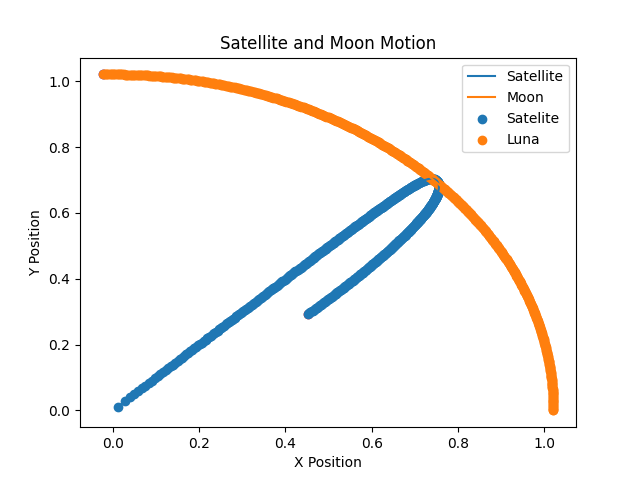

In [39]:
plt.scatter(x,y,label='Satelite')
plt.scatter(xluna,yluna,label='Luna')
plt.legend()
plt.show()

In [40]:
def update(frame):
    plt.clf() 
    plt.plot(x[:frame], y[:frame], label='Satellite')
    plt.plot(xluna[:frame], yluna[:frame], label='Moon')
    plt.scatter(x[frame], y[frame], color='red') 
    plt.scatter(xluna[frame], yluna[frame], color='blue')
    plt.legend()
    plt.title('Satellite and Moon Motion')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')

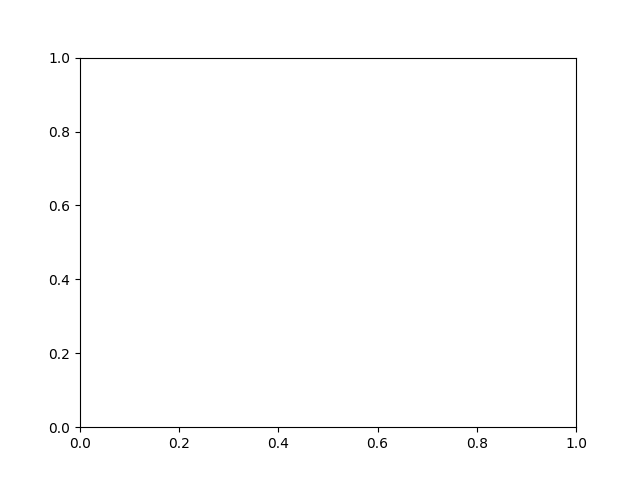

In [41]:
fig, ax = plt.subplots()

# Set up the animation
animation = FuncAnimation(fig, update, frames=len(x), interval=50, repeat=False)

plt.show()